In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

concrete_df=pd.read_csv("concrete.csv")
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [50]:
concrete_df.info()

# As seen below there are no null values and the datatypes are also as expected (Not 'Object' type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [51]:
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
# EDA - Univariate Analysis as per the above description :
# 1) 'cement' - The maximum value is way more than the mean value which indicates a possiblity of outliers
# 2) 'slag','ash','superplastic' - Contains '0' value (Needs to be either removed or replaced with median or to contact domain
#                                  expertise)

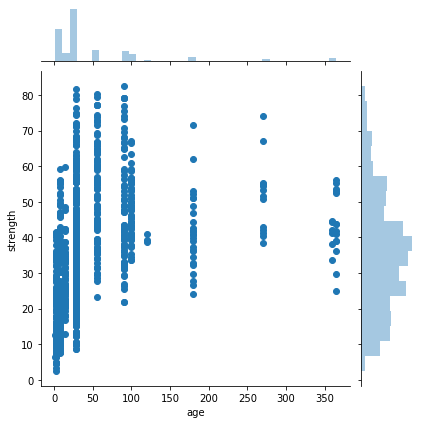

In [52]:
sns.jointplot(concrete_df['age'],concrete_df['strength'])

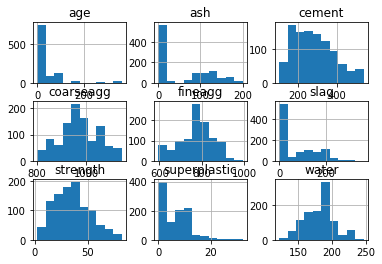

<Figure size 1152x1152 with 0 Axes>

In [58]:
concrete_df.hist()

# As seen below, due to presence of 0 values the normality of features are affected

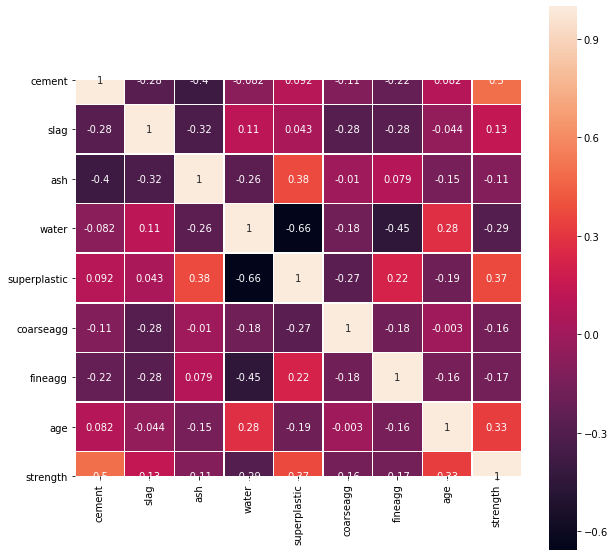

In [53]:
plt.figure(figsize=(10, 10))
sns.heatmap(concrete_df.corr(),annot=True,square=True,linewidths=.5,)

# As seen in the correlation graph, the target column('strength') has a good correlation with 'age' and 'cement' variables
# Variables which have less than -0.80 correlation value with the target variable can be removed but there is no such relation.
# Out of the 8 independent variables only 4 are having positive relation with the target variable.
# Out the 4 weakly correlated variables 3 variables have a good relation with other independent variables(which have a good
#                       relation with the target variable)
# 'coarseagg' variable has negative correlation with all variables which indicates that this is the least important variable.


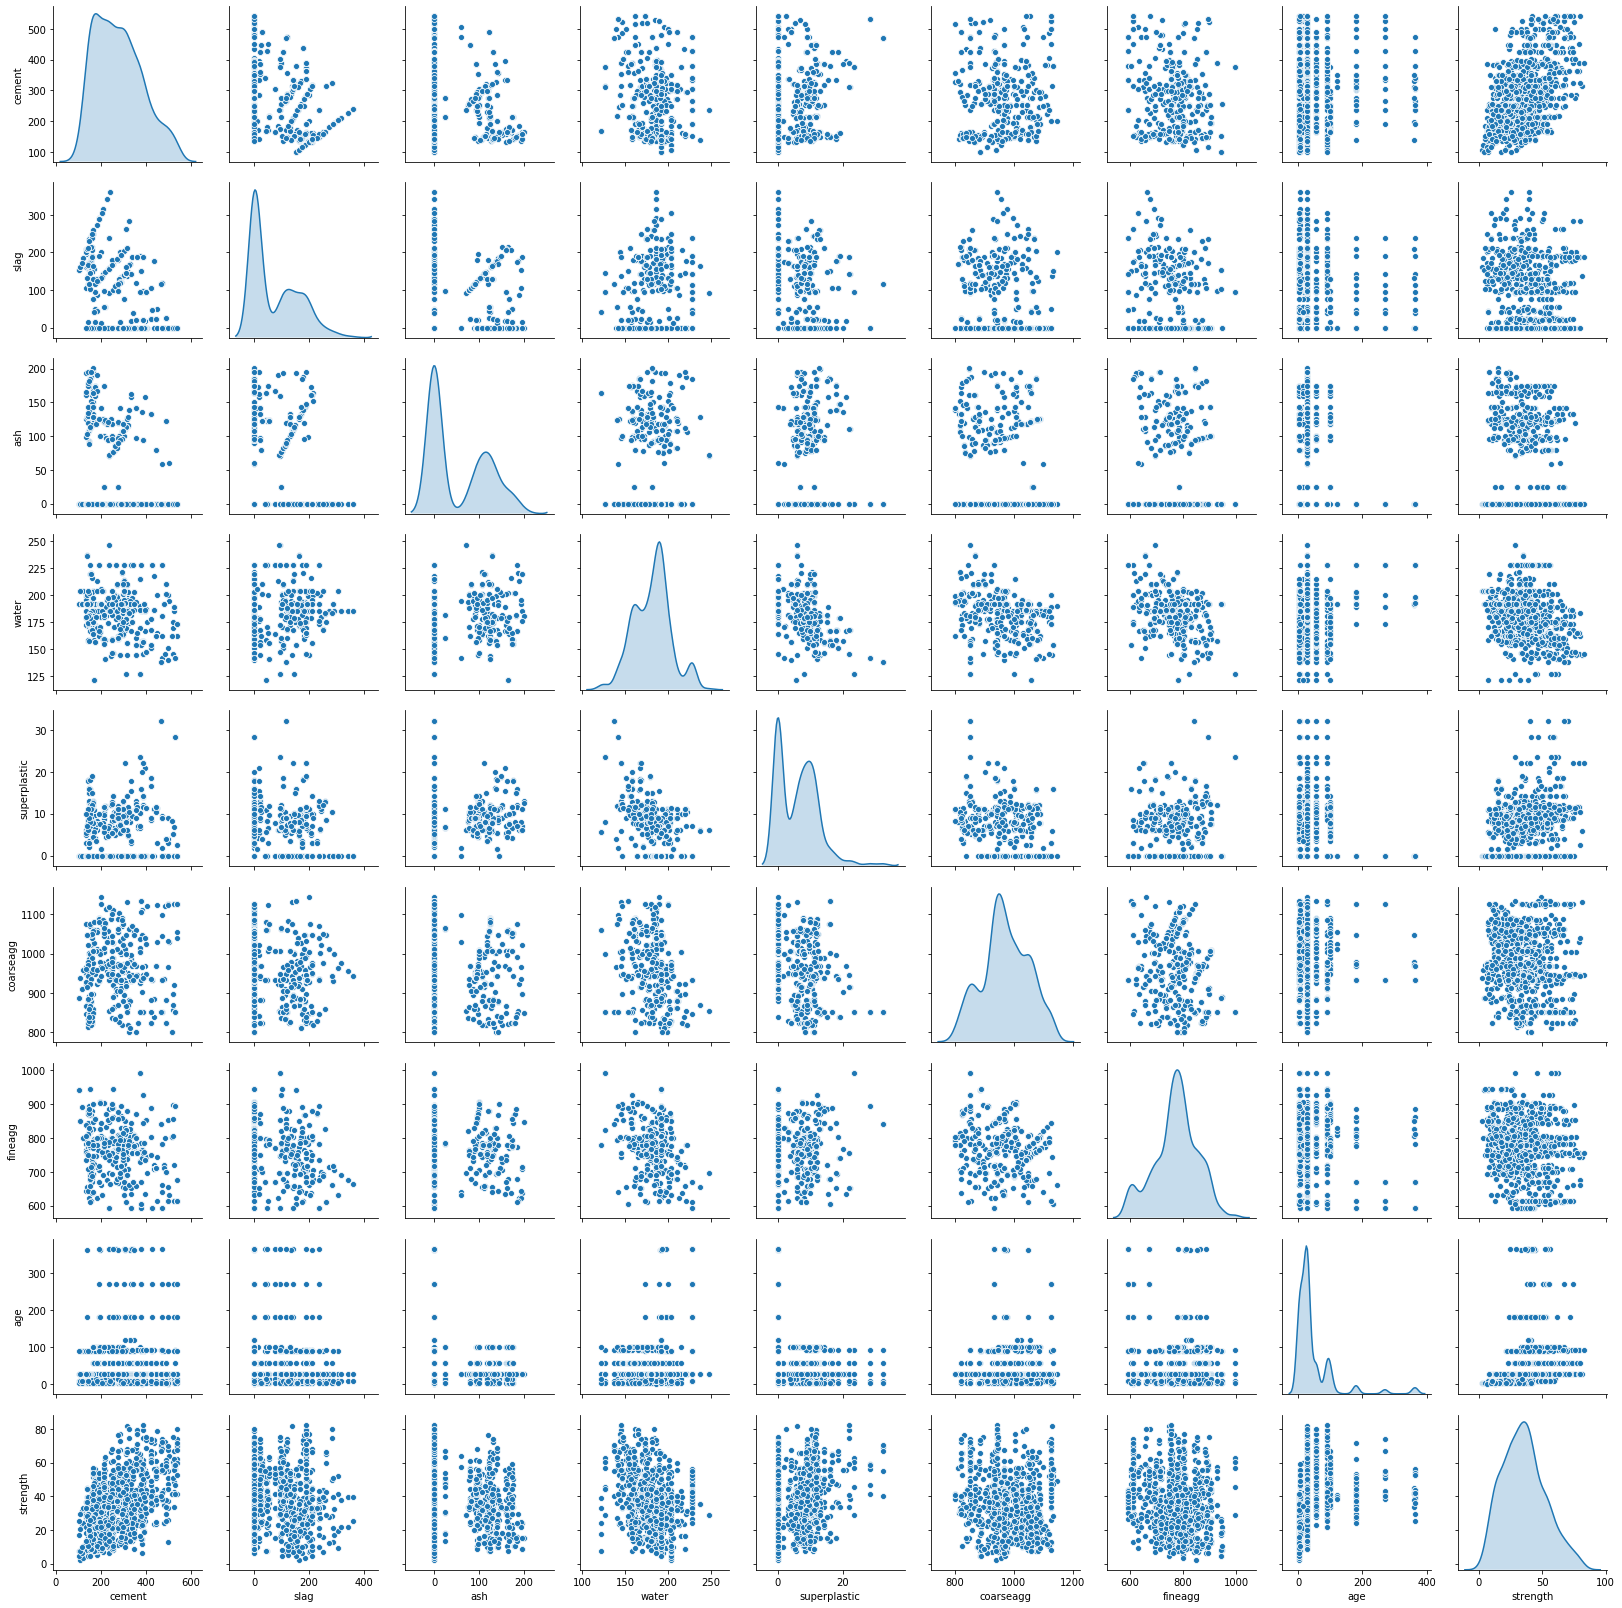

In [54]:
sns.pairplot(concrete_df,diag_kind='kde')

# As seen below, there is a vertical line in 'ash','slag','superplastic' plot which indicates a high concentration of 
#                             data at a single point.

In [60]:
concrete_df.astype(bool).sum(axis=0)

# As seen below, these are the number of non-zero values in each column
# Number of '0' in 'slag'=1030-559 -->471
# Number of '0' in 'ash'=1030-464 -->566
# Number of '0' in 'superplastic'=1030-651 -->379
# It is evident that the number of zero values in 'slag','ash' and 'superplastic' columns is more than accepted number to be
# removed from dataset

cement          1030
slag             559
ash              464
water           1030
superplastic     651
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

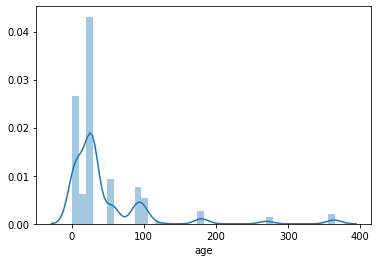

In [61]:
sns.distplot(concrete_df['age'],kde=True)

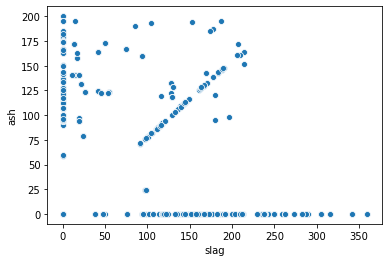

In [62]:
sns.scatterplot(x='slag',y='ash',data=concrete_df)

In [63]:
# As seen from the above plot, there is some relation between the two variables
# But due to te presence of '0' the relation is not clear
# 
# Let's replace the '0's with mean and median

print("Mean of 'ash' : ",concrete_df['ash'].mean())
print("Median of 'ash' : ",concrete_df['ash'].median())
print("Mean of 'slag' : ",concrete_df['slag'].mean())
print("Median of 'slag' : ",concrete_df['slag'].median())

Mean of 'ash' :  54.188349514563086
Median of 'ash' :  0.0
Mean of 'slag' :  73.89582524271844
Median of 'slag' :  22.0


In [64]:
mean_df=pd.DataFrame()
mean_df['ash']=concrete_df['ash'].replace(to_replace=0,value=concrete_df['ash'].mean())
mean_df['slag']=concrete_df['slag'].replace(to_replace=0,value=concrete_df['slag'].mean())

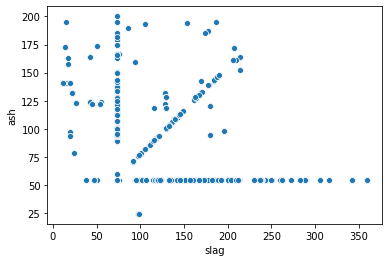

In [65]:
sns.scatterplot(x='slag',y='ash',data=mean_df)

# As seen below, the relation is same as before.
# Let's replace the 0's with a random value in the range -> median +or- 10

In [77]:
def replaceZeors(df,column):
    for i in range(len(df)):
        if(df.iloc[i,df.columns.get_loc(column)]==0.0):
            df.iloc[i,df.columns.get_loc(column)]=np.random.randint(concrete_df[column].mean()-10,concrete_df[column].mean()+10)
    return df

In [78]:
concrete_df=replaceZeors(concrete_df,'ash')
concrete_df=replaceZeors(concrete_df,'slag')

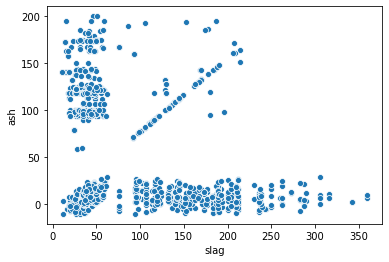

In [68]:
sns.scatterplot(x='slag',y='ash',data=concrete_df)

In [79]:
concrete_df=replaceZeors(concrete_df,'superplastic')

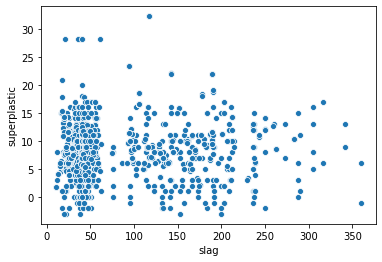

In [71]:
sns.scatterplot(x='slag',y='superplastic',data=concrete_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x153D0A30>,
      dtype=object)

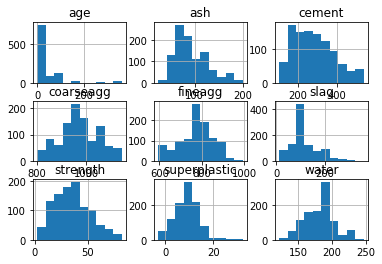

In [80]:
concrete_df.hist()

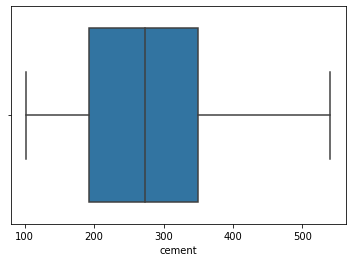

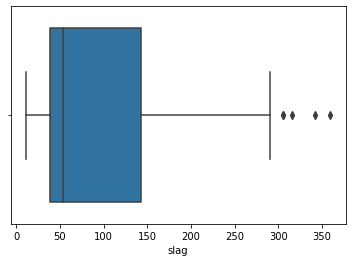

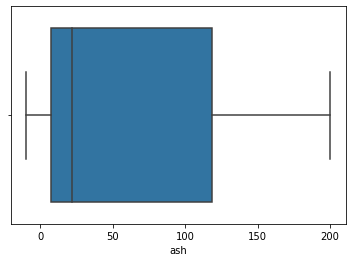

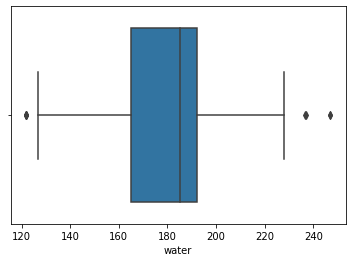

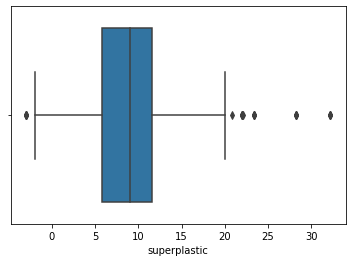

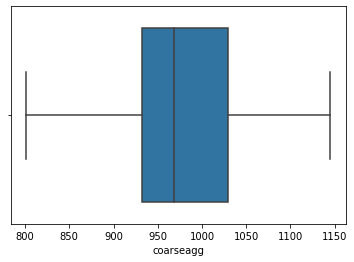

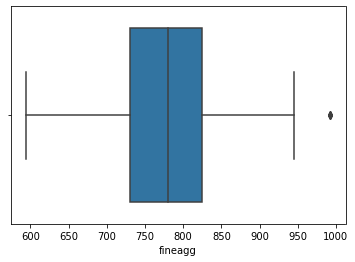

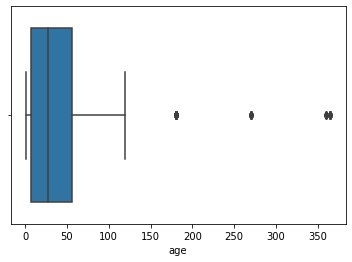

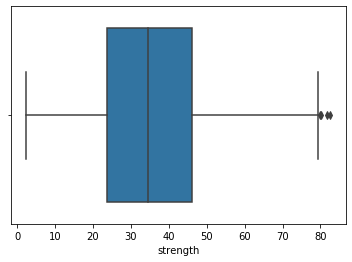

In [5]:
# Outliers plot

columns = concrete_df.columns
for i,column in enumerate(columns[0:len(columns)+1]):
    plt.figure(i)
    sns.boxplot(concrete_df[column])

In [81]:
# Method to remove outliers
def removeOutliers(column,df):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    df=df[df[column]<(q3+(1.5*iqr))]
    df=df[df[column]>(q1-(1.5*iqr))]
    return df

In [82]:
concrete_df=removeOutliers("slag",concrete_df)
concrete_df=removeOutliers("water",concrete_df)
concrete_df=removeOutliers("superplastic",concrete_df)
concrete_df=removeOutliers("fineagg",concrete_df)
concrete_df=removeOutliers("age",concrete_df)
concrete_df=removeOutliers("age",concrete_df)
concrete_df=removeOutliers("fineagg",concrete_df)
concrete_df=removeOutliers("strength",concrete_df)
concrete_df=removeOutliers("strength",concrete_df)
concrete_df=removeOutliers("fineagg",concrete_df)
concrete_df=removeOutliers("strength",concrete_df)

In [ ]:
# Outliers plot

columns = concrete_df.columns
for i,column in enumerate(columns[0:len(columns)+1]):
    plt.figure(i)
    sns.boxplot(concrete_df[column])

In [ ]:
sns.pairplot(concrete_df,diag_kind='kde')

# As seen below after removing outliers and replacing the missing values, there is a very small corelation between the variables

In [83]:
# Splitting data into Train(70%), Validation(20%) and Test(10%)

from sklearn.model_selection import train_test_split
from scipy.stats import zscore

X=concrete_df.drop(['strength'],axis=1)
y=concrete_df['strength']
Original_X_train, Original_X_test, Original_y_train, Original_y_test =train_test_split(X,y,test_size=0.10,random_state=1)
Original_X_train,Original_X_val,Original_y_train,Original_y_val=train_test_split(Original_X_train,Original_y_train,test_size=0.30,random_state=1)

# ORIGINAL DATASET
Original_X_train=Original_X_train.apply(zscore)
Original_X_test=Original_X_test.apply(zscore)
Original_X_val=Original_X_val.apply(zscore)

[0.22347407 0.18419845 0.14876679 0.14142156 0.11699164 0.10994709
 0.05759326 0.01760713]


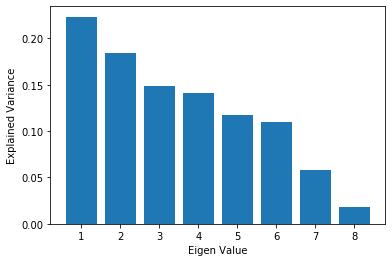

[0.22347407 0.40767252 0.55643931 0.69786087 0.81485252 0.92479961
 0.98239287 1.        ]
(705, 7)


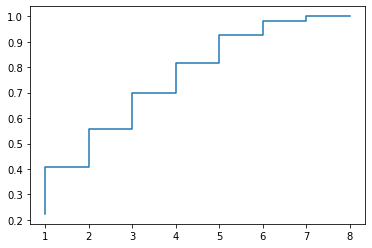

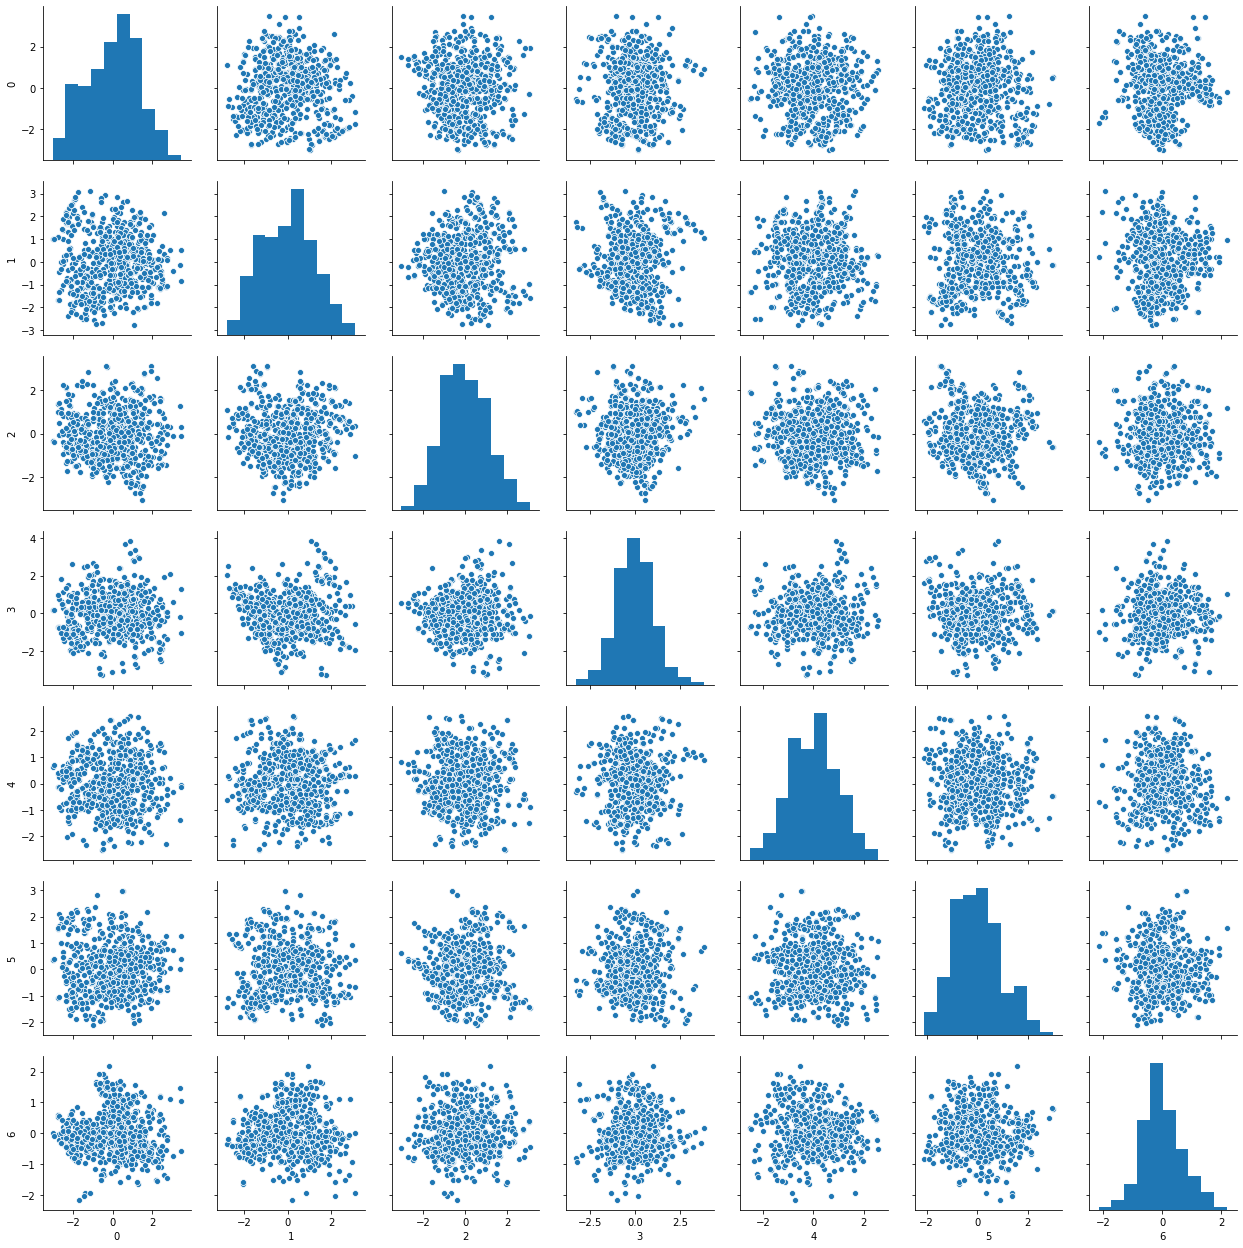

In [84]:
#original, PCA, Kmeans, poly, feature imp (normalise after everytime)

from scipy.stats import zscore
from sklearn.decomposition import PCA

X=concrete_df.drop(['strength'],axis=1)
y=concrete_df['strength']

pca_model=PCA()
pca_model.fit(X.apply(zscore))

print(pca_model.explained_variance_ratio_)

plt1=plt.bar(range(1,X.apply(zscore).shape[1]+1),pca_model.explained_variance_ratio_)
plt.xlabel('Eigen Value')
plt.ylabel('Explained Variance')
plt.show()

plt.step(range(1,X.apply(zscore).shape[1]+1),np.cumsum(pca_model.explained_variance_ratio_))

# As seen below the elbow can be seen at the 6th variable
print(np.cumsum(pca_model.explained_variance_ratio_))

# Perform PCA with 7 components

newPCA=PCA(n_components=7)
newPCA.fit(X.apply(zscore))

pca_df=newPCA.transform(X.apply(zscore))

print(pca_df.shape)
pca_df=pd.DataFrame(pca_df)

sns.pairplot(pca_df)
pca_df['strength']=y.values

In [85]:
pca_X=pca_df.drop(['strength'],axis=1)
pca_y=pca_df['strength']
pca_X_train, pca_X_test, pca_y_train, pca_y_test =train_test_split(pca_X,pca_y,test_size=0.10,random_state=1)
pca_X_train,pca_X_val,pca_y_train,pca_y_val=train_test_split(pca_X_train,pca_y_train,test_size=0.30,random_state=1)

# PCA DATASET
# pca_X_train
# pca_X_test
# pca_X_val

Groups Assigned : 



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,GROUP
0,141.3,212.0,46.0,203.5,0.0,971.8,748.5,28,2
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,4
2,250.0,70.0,95.7,187.4,5.5,956.9,861.2,28,2
3,266.0,114.0,45.0,228.0,4.0,932.0,670.0,28,0
4,154.8,183.4,61.0,193.3,9.1,1047.4,696.7,28,6


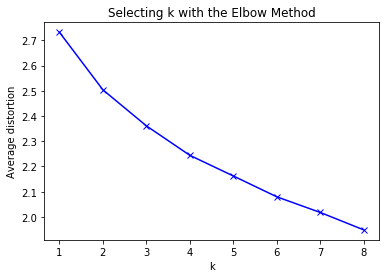

In [86]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,9)
meanDistortions=[]
cluster_X=concrete_df.drop(['strength'],axis=1)
y=concrete_df['strength']

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cluster_X.apply(zscore))
    prediction=model.predict(cluster_X.apply(zscore))
    meanDistortions.append(sum(np.min(cdist(cluster_X.apply(zscore), model.cluster_centers_, 'euclidean'), axis=1)) / cluster_X.apply(zscore).shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# Let us first start with K = 7
final_model=KMeans(7)
final_model.fit(cluster_X.apply(zscore))
clusters=final_model.predict(cluster_X.apply(zscore))

#Append the prediction 
cluster_X["GROUP"] = clusters
print("Groups Assigned : \n")
cluster_X.head()

In [87]:
cluster_X_train, cluster_X_test, cluster_y_train, cluster_y_test =train_test_split(cluster_X,y,test_size=0.10,random_state=1)
cluster_X_train,cluster_X_val,cluster_y_train,cluster_y_val=train_test_split(cluster_X_train,cluster_y_train,test_size=0.30,random_state=1)


cluster_X_train=cluster_X_train.apply(zscore)
cluster_X_val=cluster_X_val.apply(zscore)
cluster_X_test=cluster_X_test.apply(zscore)


# CLUSTERED DATASET
# cluster_X_train
# cluster_X_test
# cluster_X_val

In [88]:
from sklearn.tree import DecisionTreeRegressor

X=concrete_df.drop(['strength'],axis=1)
y=concrete_df['strength']
decTree=DecisionTreeRegressor()
decTree.fit(X,y)
print(dict(zip(X.columns,decTree.feature_importances_)))

{'cement': 0.35643928408818343, 'slag': 0.07932851998524564, 'ash': 0.03672181436084811, 'water': 0.1167590905772628, 'superplastic': 0.01685063994358748, 'coarseagg': 0.06460626683087918, 'fineagg': 0.025741843328346652, 'age': 0.30355254088564676}


In [89]:
# Let's drop the features which less than 3% significance
X=X.drop(['fineagg'],axis=1)
X=X.drop(['superplastic'],axis=1)
impFeature_X_train, impFeature_X_test, impFeature_y_train, impFeature_y_test =train_test_split(X,y,test_size=0.10,random_state=1)
impFeature_X_train,impFeature_X_val,impFeature_y_train,impFeature_y_val=train_test_split(impFeature_X_train,impFeature_y_train,test_size=0.30,random_state=1)

# ORIGINAL DATASET
impFeature_X_train=impFeature_X_train.apply(zscore)
impFeature_X_test=impFeature_X_test.apply(zscore)
impFeature_X_val=impFeature_X_val.apply(zscore)



In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=True)
poly_X=concrete_df.drop(['strength'],axis=1)
y=concrete_df['strength']
poly_X=poly.fit_transform(poly_X)
poly_X=pd.DataFrame(poly_X)
y=pd.DataFrame(y)

poly_X_train, poly_X_test, poly_y_train, poly_y_test =train_test_split(poly_X,y,test_size=0.10,random_state=1)
poly_X_train,poly_X_val,poly_y_train,poly_y_val=train_test_split(poly_X_train,poly_y_train,test_size=0.30,random_state=1)

# POLYNOMIAL DATASET
# poly_X_train
# poly_X_val
# poly_X_test

In [35]:
# We have created five different datasets using various methods

# ORIGINAL DATASET - Contains data as taken from the data source (after handling outliers and missing values)
# CLUSTERED DATASET - Dataset created after handling the clusters and creating a new feature
# PCA DATASET - Dataset created after performing PCA
# IMPORTANT FEATURES - Contains only features that are important as returned by decision tree
# POLYNOMIAL DATASET

# Lets run different algorithms on each dataset and observe the scores

In [91]:
# LINEAR REGRESSION ON ORIGINAL DATASET
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
summary = linear_model.fit(Original_X_train,Original_y_train)
print("Score of the Linear model on Original Data set : ",linear_model.score(Original_X_val,Original_y_val))

import statsmodels.api as sm
X1 = sm.add_constant(Original_X_val)
result = sm.OLS(Original_y_val, X1).fit()
#print dir(result)
print( "R-Squared value of the Linear model on Original Data set : ",result.rsquared)
print( "Adj-R-Squared value of the Linear model on Original Data set : ", result.rsquared_adj)

Score of the Linear model on Original Data set :  0.7890345305275076
R-Squared value of the Linear model on Original Data set :  0.814282001617403
Adj-R-Squared value of the Linear model on Original Data set :  0.8061185731170691


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [92]:
# LINEAR REGRESSION ON PCA
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
summary = linear_model.fit(pca_X_train,pca_y_train)
print("Score of the Linear model on PCA Data set : ",linear_model.score(pca_X_val,pca_y_val))

import statsmodels.api as sm
X1 = sm.add_constant(pca_X_val)
result = sm.OLS(pca_y_val, X1).fit()
print( "R-Squared value of the Linear model on PCA Data set : ",result.rsquared)
print( "Adj-R-Squared value of the Linear model on PCA Data set : ", result.rsquared_adj)

# Linear regression on original data set is better than the PCA dataset

Score of the Linear model on PCA Data set :  0.8014684954827702
R-Squared value of the Linear model on PCA Data set :  0.8101627454383479
Adj-R-Squared value of the Linear model on PCA Data set :  0.802901211110853


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [118]:
# LINEAR REGRESSION ON CLUSTER DATA
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
summary = linear_model.fit(cluster_X_train,cluster_y_train)
print("Score of the Linear model on Clustered Data set : ",linear_model.score(cluster_X_val,cluster_y_val))

import statsmodels.api as sm
X1 = sm.add_constant(cluster_X_val)
result = sm.OLS(cluster_y_val, X1).fit()
print( "R-Squared value of the Linear model on Clustered Data set : ",result.rsquared)
print( "Adj-R-Squared value of the Linear model on Clustered Data set : ", result.rsquared_adj)

# Linear regression on original data set is better than the PCA dataset

Score of the Linear model on Clustered Data set :  0.780688308419089
R-Squared value of the Linear model on Clustered Data set :  0.8145378059493039
Adj-R-Squared value of the Linear model on Clustered Data set :  0.8053159288970594


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
# LINEAR REGRESSION ON IMPORTANT FEATURES
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
summary = linear_model.fit(impFeature_X_train,impFeature_y_train)
print("Score of the Linear model on Important Features Data set : ",linear_model.score(impFeature_X_val,impFeature_y_val))

import statsmodels.api as sm
X1 = sm.add_constant(impFeature_X_val)
result = sm.OLS(impFeature_y_val, X1).fit()
print( "R-Squared value of the Linear model on Important Features Data set : ",result.rsquared)
print( "Adj-R-Squared value of the Linear model on Important Features Data set : ", result.rsquared_adj)

# Linear regression on original data set is better than the PCA dataset

Score of the Linear model on Important Features Data set :  0.7323515153351684
R-Squared value of the Linear model on Important Features Data set :  0.7554362704879738
Adj-R-Squared value of the Linear model on Important Features Data set :  0.7474613662647556


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [95]:
# LINEAR REGRESSION ON POLYNOMIAL FEATURES
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()
summary = linear_model.fit(poly_X_train,poly_y_train)
print("Score of the Linear model on Polynomial Features Data set : ",linear_model.score(poly_X_val,poly_y_val))

import statsmodels.api as sm
X1 = sm.add_constant(poly_X_val)
result = sm.OLS(np.asarray(poly_y_val), X1).fit()
print( "R-Squared value of the Linear model on Polynomial Features Data set : ",result.rsquared)
print( "Adj-R-Squared value of the Linear model on Polynomial Features Data set : ", result.rsquared_adj)

# Linear regression on original data set is better than the PCA dataset

Score of the Linear model on Polynomial Features Data set :  0.8161271607404451
R-Squared value of the Linear model on Polynomial Features Data set :  0.8803877630950127
Adj-R-Squared value of the Linear model on Polynomial Features Data set :  0.8524264609613792


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [96]:
# LINEAR REGRESSION ON ALL DATASETS WITH RIDGE REGULARISATION

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge_model=Ridge(alpha=0.3)
ridge_model.fit(Original_X_train,Original_y_train)
print("Ridge model score with Original_Validation data    : ",ridge_model.score(Original_X_val,Original_y_val))

ridge_model=Ridge(alpha=0.3)
ridge_model.fit(pca_X_train,pca_y_train)
print("Ridge model score with PCA_Validation data         : ",ridge_model.score(pca_X_val,pca_y_val))

ridge_model=Ridge(alpha=0.3)
ridge_model.fit(cluster_X_train,cluster_y_train)
print("Ridge model score with CLustered_Validation data   : ",ridge_model.score(cluster_X_val,cluster_y_val))

ridge_model=Ridge(alpha=0.3)
ridge_model.fit(impFeature_X_train,impFeature_y_train)
print("Ridge model score with ImpFeatures_Validation data : ",ridge_model.score(impFeature_X_val,impFeature_y_val))

ridge_model=Ridge(alpha=0.3)
ridge_model.fit(poly_X_train,poly_y_train)
print("Ridge model score with Polynomial_Validation data  : ",ridge_model.score(poly_X_val,poly_y_val))

Ridge model score with Original_Validation data    :  0.7890887630724955
Ridge model score with PCA_Validation data         :  0.8014790459412416
Ridge model score with CLustered_Validation data   :  0.7807434424486714
Ridge model score with ImpFeatures_Validation data :  0.7323799612503084
Ridge model score with Polynomial_Validation data  :  0.8162295348181471


In [97]:
# LINEAR REGRESSION ON ALL DATASETS WITH LASSO REGULARISATION
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lasso_model=Lasso(alpha=0.3)
lasso_model.fit(Original_X_train,Original_y_train)
pred_y=lasso_model.predict(Original_X_val)
print("Lasso model score with Original_Validation data   : ",lasso_model.score(Original_X_val,Original_y_val))

lasso_model=Lasso(alpha=0.3)
lasso_model.fit(pca_X_train,pca_y_train)
pred_y=lasso_model.predict(pca_X_val)
print("Lasso model score with PCA_Validation data        : ",lasso_model.score(pca_X_val,pca_y_val))

lasso_model=Lasso(alpha=0.3)
lasso_model.fit(cluster_X_train,cluster_y_train)
print("Lasso model score with Clustered_Validation data  : ",lasso_model.score(cluster_X_val,cluster_y_val))

lasso_model=Lasso(alpha=0.3)
lasso_model.fit(impFeature_X_train,impFeature_y_train)
print("Lasso model score with ImpFeature_Validation data : ",lasso_model.score(impFeature_X_val,impFeature_y_val))

lasso_model=Lasso(alpha=0.3)
lasso_model.fit(poly_X_train,poly_y_train)
print("Lasso model score with Polynomial_Validation data : ",lasso_model.score(poly_X_val,poly_y_val))

Lasso model score with Original_Validation data   :  0.7862371805754607
Lasso model score with PCA_Validation data        :  0.7992286141062644
Lasso model score with Clustered_Validation data  :  0.7788709925097412
Lasso model score with ImpFeature_Validation data :  0.7327936800128176
Lasso model score with Polynomial_Validation data :  0.820041149041505


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9409.251852034571, tolerance: 10.56316502623025
  positive)


In [98]:
# SUPPORT VECTOR REGRESSOR ON ALL DATASETS

from sklearn import svm

svr_model=svm.SVR()
svr_model.fit(Original_X_train,Original_y_train)
print("SVR model score with Original_Validation data : ",svr_model.score(Original_X_val,Original_y_val))

svr_model=svm.SVR()
svr_model.fit(pca_X_train,pca_y_train)
print("SVR model score with PCA_Validation data : ",svr_model.score(pca_X_val,pca_y_val))\

svr_model=svm.SVR()
svr_model.fit(cluster_X_train,cluster_y_train)
print("SVR model score with Clustered_Validation data  : ",svr_model.score(cluster_X_val,cluster_y_val))

svr_model=svm.SVR()
svr_model.fit(impFeature_X_train,impFeature_y_train)
print("SVR model score with ImpFeature_Validation data : ",svr_model.score(impFeature_X_val,impFeature_y_val))

svr_model=svm.SVR()
svr_model.fit(poly_X_train,poly_y_train)
print("SVR model score with Polynomial_Validation data : ",svr_model.score(poly_X_val,poly_y_val))

SVR model score with Original_Validation data :  0.6337369790877361
SVR model score with PCA_Validation data :  0.6252015032248484
SVR model score with Clustered_Validation data  :  0.630814184320138
SVR model score with ImpFeature_Validation data :  0.6438087413148925


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR model score with Polynomial_Validation data :  -0.0011509027797433902


In [99]:
# GRID SEARCH ON ORIGINAL DATASET FOR SVR

from sklearn.model_selection import GridSearchCV
svm_param_grid={'kernel':('linear', 'poly', 'rbf'),'C':[1, 10]}
svr_model=svm.SVR()
svm_gridSearch=GridSearchCV(svr_model,svm_param_grid,cv=5)
svm_gridSearch.fit(Original_X_train,Original_y_train)

print("The best SVR model from the list of kernels : ",svm_gridSearch.best_params_)
print("Score of the best model ",svm_gridSearch.best_score_)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

The best SVR model from the list of kernels :  {'C': 10, 'kernel': 'rbf'}
Score of the best model  0.8001828110512992


In [100]:
# GRID SEARCH ON PCA DATASET FOR SVR

svm_param_grid={'kernel':('linear', 'poly', 'rbf'),'C':[1, 10]}
svr_model=svm.SVR()
svm_gridSearch=GridSearchCV(svr_model,svm_param_grid,cv=5)
svm_gridSearch.fit(pca_X_train,pca_y_train)

print("The best SVR model from the list of kernels : ",svm_gridSearch.best_params_)
print("Score of the best model ",svm_gridSearch.best_score_)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

The best SVR model from the list of kernels :  {'C': 10, 'kernel': 'rbf'}
Score of the best model  0.7992580490969604


In [101]:
# GRID SEARCH ON CLUSTERED DATASET FOR SVR

svm_param_grid={'kernel':('linear', 'poly', 'rbf'),'C':[1, 10]}
svr_model=svm.SVR()
svm_gridSearch=GridSearchCV(svr_model,svm_param_grid,cv=5)
svm_gridSearch.fit(cluster_X_train,cluster_y_train)

print("The best SVR model from the list of kernels : ",svm_gridSearch.best_params_)
print("Score of the best model ",svm_gridSearch.best_score_)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

The best SVR model from the list of kernels :  {'C': 10, 'kernel': 'rbf'}
Score of the best model  0.8077365299271946


In [102]:
# GRID SEARCH ON IMPORTANT FEATURES DATASET FOR SVR

svm_param_grid={'kernel':('linear', 'poly', 'rbf'),'C':[1, 10]}
svr_model=svm.SVR()
svm_gridSearch=GridSearchCV(svr_model,svm_param_grid,cv=5)
svm_gridSearch.fit(impFeature_X_train,impFeature_y_train)

print("The best SVR model from the list of kernels : ",svm_gridSearch.best_params_)
print("Score of the best model ",svm_gridSearch.best_score_)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

The best SVR model from the list of kernels :  {'C': 10, 'kernel': 'rbf'}
Score of the best model  0.7880562354142783


In [103]:
# GRID SEARCH ON ORIGINAL DATASET FOR RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

rdn_reg=RandomForestRegressor()
rdn_reg.fit(Original_X_train,Original_y_train)
print(rdn_reg.score(Original_X_val,Original_y_val))

rdn_reg_gridParams={'criterion':('mse','mae'),'n_estimators':(10,30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50)}
rdn_reg=RandomForestRegressor()
rdn_gridSearch=GridSearchCV(rdn_reg,rdn_reg_gridParams,cv=10)
rdn_gridSearch.fit(Original_X_train,Original_y_train)
print(rdn_gridSearch.score(Original_X_val,Original_y_val))

# We got a good score without any regularisation parameters which means the model is overfit
# With help of gridSearch, on searching for the best regularisation parameter, the score is very less

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7766192229135084
0.6595987278140756


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
# GRID SEARCH ON PCA DATASET FOR RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

rdn_reg=RandomForestRegressor()
rdn_reg.fit(pca_X_train,pca_y_train)
print(rdn_reg.score(pca_X_val,pca_y_val))

rdn_reg_gridParams={'criterion':('mse','mae'),'n_estimators':(10,30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50)}
rdn_reg=RandomForestRegressor()
rdn_gridSearch=GridSearchCV(rdn_reg,rdn_reg_gridParams,cv=10)
rdn_gridSearch.fit(pca_X_train,pca_y_train)
print(rdn_gridSearch.score(pca_X_val,pca_y_val))

# We got a good score without any regularisation parameters which means the model is overfit
# With help of gridSearch, on searching for the best regularisation parameter, the score is very less

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7365894440163041


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.5269681327071503


In [31]:
# GRID SEARCH ON CLUSTERED DATASET FOR RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

rdn_reg=RandomForestRegressor()
rdn_reg.fit(cluster_X_train,cluster_y_train)
print(rdn_reg.score(cluster_X_val,cluster_y_val))

rdn_reg_gridParams={'criterion':('mse','mae'),'n_estimators':(10,30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50)}
rdn_reg=RandomForestRegressor()
rdn_gridSearch=GridSearchCV(rdn_reg,rdn_reg_gridParams,cv=10)
rdn_gridSearch.fit(cluster_X_train,cluster_y_train)
print(rdn_gridSearch.score(cluster_X_val,cluster_y_val))

# We got a good score without any regularisation parameters which means the model is overfit
# With help of gridSearch, on searching for the best regularisation parameter, the score is very less

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7923499049221091


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6372842019019318


In [32]:
# GRID SEARCH ON IMPORTANT FEATURES DATASET FOR RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

rdn_reg=RandomForestRegressor()
rdn_reg.fit(impFeature_X_train,impFeature_y_train)
print(rdn_reg.score(impFeature_X_val,impFeature_y_val))

rdn_reg_gridParams={'criterion':('mse','mae'),'n_estimators':(10,30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50)}
rdn_reg=RandomForestRegressor()
rdn_gridSearch=GridSearchCV(rdn_reg,rdn_reg_gridParams,cv=10)
rdn_gridSearch.fit(impFeature_X_train,impFeature_y_train)
print(rdn_gridSearch.score(impFeature_X_val,impFeature_y_val))

# We got a good score without any regularisation parameters which means the model is overfit
# With help of gridSearch, on searching for the best regularisation parameter, the score is very less

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7854232559457126


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6620833166446908


In [33]:
# GRID SEARCH ON POLYNOMIAL FEATURES DATASET FOR RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

rdn_reg=RandomForestRegressor()
rdn_reg.fit(poly_X_train,poly_y_train)
print(rdn_reg.score(poly_X_val,poly_y_val))

rdn_reg_gridParams={'criterion':('mse','mae'),'n_estimators':(10,30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50)}
rdn_reg=RandomForestRegressor()
rdn_gridSearch=GridSearchCV(rdn_reg,rdn_reg_gridParams,cv=10)
rdn_gridSearch.fit(poly_X_train,poly_y_train)
print(rdn_gridSearch.score(poly_X_val,poly_y_val))

# We got a good score without any regularisation parameters which means the model is overfit
# With help of gridSearch, on searching for the best regularisation parameter, the score is very less

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.814628625859023


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

0.7088217238012964


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Text(0, 0.5, 'Mean error')

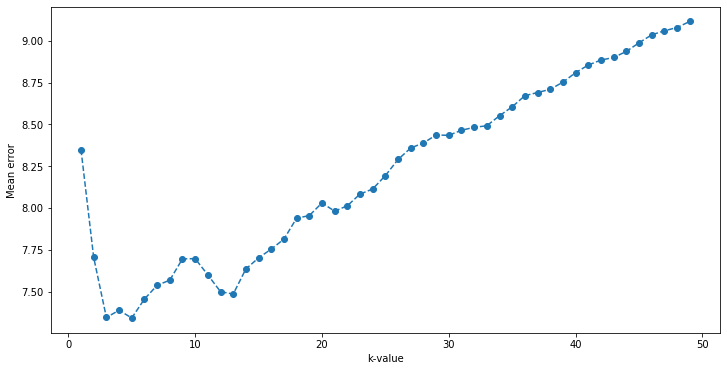

In [104]:
# FINDING OPTIMUM K FOR KNN REGRESSOR

from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error 

knn=KNeighborsRegressor()

rmse_val=[]
for i in range(1,50):
    knn_imodel=KNeighborsRegressor(n_neighbors=i)
    knn_imodel.fit(Original_X_train,Original_y_train)
    y_iPredicted=knn_imodel.predict(Original_X_val)
    error = sqrt(mean_squared_error(Original_y_val,y_iPredicted)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
plt.figure(figsize=(12,6))
plt.plot(range(1,50),rmse_val,marker='o', linestyle='dashed')
plt.xlabel('k-value')
plt.ylabel('Mean error')

# As seen below, k value should be 3 or 5
# Lets take k as 5

In [107]:
# PERFORMING KNN REGRESSOR WITH K VALUE AS 5

knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(Original_X_train,Original_y_train)
y_predicted= knn_model.predict(Original_X_val)
print("KNN Regressor on original data set :",knn_model.score(Original_X_val,Original_y_val))

knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(pca_X_train,pca_y_train)
print("KNN Regressor on PCA data set :",knn_model.score(pca_X_val,pca_y_val))

knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(cluster_X_train,cluster_y_train)
print("KNN Regressor on Clustered data set :",knn_model.score(cluster_X_val,cluster_y_val))

knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(impFeature_X_train,impFeature_y_train)
print("KNN Regressor on ImpFeatures data set :",knn_model.score(impFeature_X_val,impFeature_y_val))

knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(poly_X_train,poly_y_train)
print("KNN Regressor on PolynomialFeatures data set :",knn_model.score(poly_X_val,poly_y_val))

KNN Regressor on original data set : 0.7616278740407927
KNN Regressor on PCA data set : 0.7784776209329244
KNN Regressor on Clustered data set : 0.7540594045985187
KNN Regressor on ImpFeatures data set : 0.7981438075026533
KNN Regressor on PolynomialFeatures data set : 0.6608711867030233


In [108]:
# ENSEMBLE - BAGGING REGRESSOR WITHOUT REGULARISATION

from sklearn.ensemble import BaggingRegressor

bag_reg=BaggingRegressor()
bag_reg.fit(Original_X_train,Original_y_train)
print(bag_reg.score(Original_X_val,Original_y_val))



0.8051731711497345


In [109]:
# GRID SEARCH ON BAGGING REGRESSOR WITH ALL DATA

linear_model_1=LinearRegression()
ridge_model=Ridge(alpha=0.3)
svr_model=svm.SVR(C= 10, kernel='rbf')
lasso_model=Lasso(alpha=0.3)
knn_model=KNeighborsRegressor(n_neighbors=7)

bag_reg_gridParams={'n_estimators':(30,50),'base_estimator':(linear_model_1,svr_model,ridge_model,lasso_model,knn_model),'max_samples':(10,30)}
bag_reg=BaggingRegressor(oob_score=True,random_state=1,)
bag_gridSearch=GridSearchCV(bag_reg,bag_reg_gridParams,cv=5)
bag_gridSearch.fit(X,y)
print("The best ADA BOOSTER model from the list of kernels : ",bag_gridSearch.best_params_)
print("Score of the best model ",bag_gridSearch.best_score_)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was pas

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\skl

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was pas

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.282846257049755, tolerance: 0.25458478900000003
  positive)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was pas

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was pas

The best SVR model from the list of kernels :  {'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'max_samples': 30, 'n_estimators': 50}
Score of the best model  0.7349647876548133


In [110]:
# ENSEMBLE - ADA BOOSTER REGRESSOR WITHOUT REGULARISATION

from sklearn.ensemble import AdaBoostRegressor

adaBoost_model=AdaBoostRegressor()
adaBoost_model.fit(Original_X_train,Original_y_train)
print(adaBoost_model.score(Original_X_val,Original_y_val))


0.7338013820619305


In [76]:
# GRID SEARCH ON ADA BOOSTER REGRESSOR WITH ALL DATA

linear_model_1=LinearRegression()
ridge_model=Ridge(alpha=0.3)
svr_model=svm.SVR(C= 10, kernel='rbf')
lasso_model=Lasso(alpha=0.3)
knn_model=KNeighborsRegressor(n_neighbors=7)

ada_reg_gridParams={'n_estimators':(30,50),'base_estimator':(linear_model_1,svr_model,ridge_model,lasso_model,knn_model)}
adaBoost_reg=AdaBoostRegressor(random_state=1,)
ada_gridSearch=GridSearchCV(adaBoost_reg,ada_reg_gridParams,cv=5)
ada_gridSearch.fit(X,y)
print("The best ADA BOOSTER model from the list of kernels : ",ada_gridSearch.best_params_)
print("Score of the best model ",ada_gridSearch.best_score_)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when 

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklear

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklear

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklear

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\AppData\Ro

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when 

The best SVR model from the list of kernels :  {'base_estimator': Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), 'n_estimators': 30}
Score of the best model  0.7736174081238483


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
# ENSEMBLE - GRADIENT BOOSTING REGRESSOR WITHOUT REGULARISATION

from sklearn.ensemble import GradientBoostingRegressor

gradBoost_model=GradientBoostingRegressor()
gradBoost_model.fit(Original_X_train,Original_y_train)
print(gradBoost_model.score(Original_X_val,Original_y_val))

0.8342644473402288


In [112]:
# GRID SEARCH ON GRADIENT BOOSTER REGRESSOR WITH ORIGINAL DATA

gradBoost_reg_gridParams={'n_estimators':(30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50),'loss' : ('ls', 'lad', 'huber', 'quantile'),'learning_rate':(0.1,0.5,0.7,0.9)}
gradBoost_model=GradientBoostingRegressor()
gradBoost_gridSearch=GridSearchCV(gradBoost_model,gradBoost_reg_gridParams,cv=5)
gradBoost_gridSearch.fit(Original_X_train,Original_y_train)
print("The best GRADIENT BOOSTER model from the list of kernels : ",gradBoost_gridSearch.best_params_)
print("Score of the best model ",gradBoost_gridSearch.best_score_)

The best SVR model from the list of kernels :  {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 15, 'min_samples_leaf': 25, 'n_estimators': 50}
Score of the best model  0.8558573542629121


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [113]:
# GRID SEARCH ON GRADIENT BOOSTER REGRESSOR WITH PCA DATA

linear_model_1=LinearRegression()
ridge_model=Ridge(alpha=0.3)
svr_model=svm.SVR(C= 10, kernel='rbf')
lasso_model=Lasso(alpha=0.3)
knn_model=KNeighborsRegressor(n_neighbors=7)

gradBoost_reg_gridParams={'n_estimators':(30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50),'loss' : ('ls', 'lad', 'huber', 'quantile'),'learning_rate':(0.1,0.5,0.7,0.9)}
gradBoost_model=GradientBoostingRegressor()
gradBoost_gridSearch=GridSearchCV(gradBoost_model,gradBoost_reg_gridParams,cv=5)
gradBoost_gridSearch.fit(pca_X_train,pca_y_train)
print("The best GRADIENT BOOSTER model from the list of kernels : ",gradBoost_gridSearch.best_params_)
print("Score of the best model ",gradBoost_gridSearch.best_score_)

The best SVR model from the list of kernels :  {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 15, 'min_samples_leaf': 25, 'n_estimators': 50}
Score of the best model  0.7542039850587814


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [114]:
# GRID SEARCH ON GRADIENT BOOSTER REGRESSOR WITH ALL DATA

linear_model_1=LinearRegression()
ridge_model=Ridge(alpha=0.3)
svr_model=svm.SVR(C= 10, kernel='rbf')
lasso_model=Lasso(alpha=0.3)
knn_model=KNeighborsRegressor(n_neighbors=7)

gradBoost_reg_gridParams={'n_estimators':(30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50),'loss' : ('ls', 'lad', 'huber', 'quantile'),'learning_rate':(0.1,0.5,0.7,0.9)}
gradBoost_model=GradientBoostingRegressor()
gradBoost_gridSearch=GridSearchCV(gradBoost_model,gradBoost_reg_gridParams,cv=5)
gradBoost_gridSearch.fit(impFeature_X_train,impFeature_y_train)
print("The best GRADIENT BOOSTER model from the list of kernels : ",gradBoost_gridSearch.best_params_)
print("Score of the best model ",gradBoost_gridSearch.best_score_)

The best SVR model from the list of kernels :  {'learning_rate': 0.5, 'loss': 'ls', 'max_depth': 25, 'min_samples_leaf': 25, 'n_estimators': 50}
Score of the best model  0.8645172009254076


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [115]:
# GRID SEARCH ON GRADIENT BOOSTER REGRESSOR WITH ALL DATA

linear_model_1=LinearRegression()
ridge_model=Ridge(alpha=0.3)
svr_model=svm.SVR(C= 10, kernel='rbf')
lasso_model=Lasso(alpha=0.3)
knn_model=KNeighborsRegressor(n_neighbors=7)

gradBoost_reg_gridParams={'n_estimators':(30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50),'loss' : ('ls', 'lad', 'huber', 'quantile'),'learning_rate':(0.1,0.5,0.7,0.9)}
gradBoost_model=GradientBoostingRegressor()
gradBoost_gridSearch=GridSearchCV(gradBoost_model,gradBoost_reg_gridParams,cv=5)
gradBoost_gridSearch.fit(poly_X_train,poly_y_train)
print("The best GRADIENT BOOSTER model from the list of kernels : ",gradBoost_gridSearch.best_params_)
print("Score of the best model ",gradBoost_gridSearch.best_score_)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boost

The best SVR model from the list of kernels :  {'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 15, 'min_samples_leaf': 50, 'n_estimators': 50}
Score of the best model  0.8670609909712841


In [116]:
# GRID SEARCH ON GRADIENT BOOSTER REGRESSOR WITH ALL DATA

linear_model_1=LinearRegression()
ridge_model=Ridge(alpha=0.3)
svr_model=svm.SVR(C= 10, kernel='rbf')
lasso_model=Lasso(alpha=0.3)
knn_model=KNeighborsRegressor(n_neighbors=7)

gradBoost_reg_gridParams={'n_estimators':(30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50),'loss' : ('ls', 'lad', 'huber', 'quantile'),'learning_rate':(0.1,0.5,0.7,0.9)}
gradBoost_model=GradientBoostingRegressor()
gradBoost_gridSearch=GridSearchCV(gradBoost_model,gradBoost_reg_gridParams,cv=5)
gradBoost_gridSearch.fit(cluster_X_train,cluster_y_train)
print("The best GRADIENT BOOSTER model from the list of kernels : ",gradBoost_gridSearch.best_params_)
print("Score of the best model ",gradBoost_gridSearch.best_score_)

The best SVR model from the list of kernels :  {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 15, 'min_samples_leaf': 25, 'n_estimators': 50}
Score of the best model  0.8586074518295863


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
# GRID SEARCH ON GRADIENT BOOSTER REGRESSOR WITH ALL DATA

linear_model_1=LinearRegression()
ridge_model=Ridge(alpha=0.3)
svr_model=svm.SVR(C= 10, kernel='rbf')
lasso_model=Lasso(alpha=0.3)
knn_model=KNeighborsRegressor(n_neighbors=7)

gradBoost_reg_gridParams={'n_estimators':(30,50),'max_depth':(15,25,30),'min_samples_leaf':(25,50),'loss' : ('ls', 'lad', 'huber', 'quantile'),'learning_rate':(0.1,0.5,0.7,0.9)}
gradBoost_model=GradientBoostingRegressor()
gradBoost_gridSearch=GridSearchCV(gradBoost_model,gradBoost_reg_gridParams,cv=5)
gradBoost_gridSearch.fit(X,y)
print("The best GRADIENT BOOSTER model from the list of kernels : ",gradBoost_gridSearch.best_params_)
print("Score of the best model ",gradBoost_gridSearch.best_score_)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

The best SVR model from the list of kernels :  {'learning_rate': 0.5, 'loss': 'ls', 'max_depth': 25, 'min_samples_leaf': 25, 'n_estimators': 50}
Score of the best model  0.8841936092047682


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
# PERFORMING K-FOLD ON GRADIENT BOOSTER REGRESSOR WITH ALL DATA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold=KFold(random_state=1,n_splits=50)
gradBoost_model=GradientBoostingRegressor(max_depth=15,min_samples_leaf=25,n_estimators=50,loss='huber')
results = cross_val_score(gradBoost_model,X,y,cv=kfold)
print(results)
print("Accuracy : ",results.mean()*100)
print("Deviation : ",results.std()*100)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversio

[0.70207807 0.76306451 0.46963958 0.90621589 0.84057765 0.86370055
 0.90604733 0.8793886  0.95862722 0.92591772 0.94590046 0.87343686
 0.95413624 0.88446244 0.88859    0.65931842 0.92738969 0.88816609
 0.91306421 0.95981298 0.8599074  0.90335589 0.87413579 0.5948336
 0.89269838 0.85103951 0.86520641 0.9348822  0.89291203 0.94039303
 0.95637418 0.88295017 0.89513509 0.8868786  0.73836059 0.91707844
 0.87081081 0.62526619 0.84803955 0.78947765 0.94300784 0.76316693
 0.93353722 0.87260362 0.88768517 0.8733219  0.91843815 0.93298864
 0.87862973 0.8140667 ]
Accuracy :  85.8934317801828
Deviation :  9.928118631992708


In [ ]:
# CONCLUSION

CLEANING DATA
1) Since there were more number of zeros in the data set, replacing all zeros with a single mean or median will give way to the
   possibility of more gaussians. So, instead of replacing with a single value, zeros have been replaced with (+or-)10 means.
2) Outliers have been removed from each column

DATA ENGINEERING
Have created five different data sets and derived train, validation and test data
1) Derived data into train, validation and test data before performing any engineering and named as Original
2) Performed PCA on the data and derived data into train, validation and test data and named as PCA data
3) Performed DecisionTreeRegressor and derived the important features. Have named the data as imp_features data
4) Have performed K-Means clusting and added a column with the category. Have named the data as cluster data
5) Have performed Polynomial features on the data and named as poly data

CHOOSING BEST MODEL
1) Linear Regression on different data sets were fetching good results but not the best (~75%)
2) Ridge and Lasso models fetched better results than linear regression (~80%)
3) SVR without regressor gave very less score but the same when regularised with help of Grid Search fetched good results (~80%)
4) Random Forest Regressor gave good scores without any regularisation but that would be due to overfitting. On regularising the
   random forrest regressor, the score dropped very much indicating that it is not the ideal model for this data
5) KNN Regressor gave som average reults (~70-75%)
6) Bagging Regressor when performed with different models and parameters with help of Grid Search gave either Ridge or Lasso as
   the best model (~75-80%)
7) Ada Bossting Regressor when performed with different models and parameters with help of Grid Search gave either Ridge or 
   Lasso as the best model (~75-80%)
8) Gradient Boosting model gave good score of ~85% before regularisation. After regularisation the score increased even more
   to around ~87% proving that it is the best model for this data set
9) On performing k-fold on Gradient Booster Regressor, we get a mean score of 85% with a deviation of 10%